In [ ]:
# Menghubungkan drive dengan colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Menampilkan seluruh baris dan kolom
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# Membaca dataset
df = pd.read_csv('/content/drive/MyDrive/Tugas Akhir/Dataset/VARIO125.csv')

In [ ]:
df

,Gender_1,Gender_2,Pengeluaran_1,Pengeluaran_2,Pengeluaran_3,Pengeluaran_4,Pengeluaran_5,Pengeluaran_6,Pengeluaran_7,Pendidikan_1,Pendidikan_2,Pendidikan_3,Pendidikan_4,Pendidikan_5,Pendidikan_6,Pendidikan_7,Fungsi_1,Fungsi_2,Fungsi_3,Fungsi_4,Fungsi_5,Fungsi_6,Fungsi_7,Total
0,39,31,6,10,16,14,21,3,0,0,1,2,63,2,2,0,3,5,1,0,32,0,29,70
1,44,45,4,12,24,22,22,3,2,0,0,3,78,4,3,1,3,9,1,0,54,1,21,89
2,68,49,2,25,38,21,25,3,3,0,0,0,104,5,8,0,2,12,0,1,70,0,32,117
3,76,39,5,25,31,21,28,4,1,0,0,3,106,0,5,1,7,13,5,3,63,0,24,115
4,59,38,3,20,22,13,33,3,3,0,0,2,81,7,7,0,5,9,3,2,58,1,19,97
5,81,36,3,17,27,16,36,14,4,0,0,1,94,6,14,2,2,10,4,0,69,0,32,117
6,54,44,3,23,20,15,28,6,3,0,1,6,85,5,1,0,1,7,6,0,61,3,20,98
7,68,39,4,23,20,24,23,9,4,0,0,2,95,3,6,1,4,10,6,3,61,0,23,107
8,63,54,6,21,26,24,27,10,3,0,0,3,103,4,7,0,2,8,3,2,71,0,31,117
9,55,55,8,15,15,26,32,10,4,0,1,0,92,11,5,1,3,15,2,0,51,0,39,110


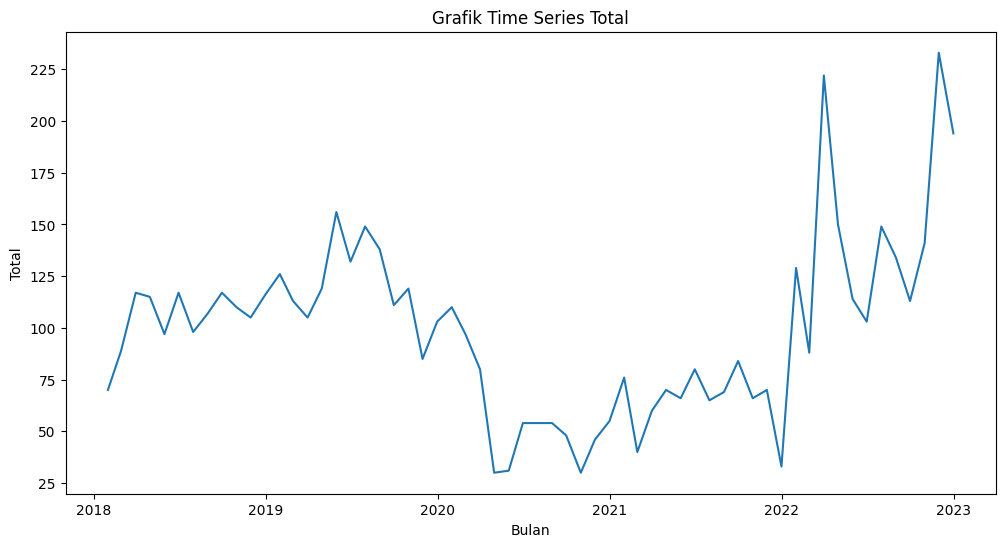

In [ ]:
# Mengatur data rentang waktu dari Januari 2018 hingga Desember 2022
x = pd.date_range(start='2018-01', end='2023-01', freq='M')

# Menyiapkan plot menggunakan seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=x, y='Total')

# Mengatur label dan judul
plt.xlabel('Bulan')
plt.ylabel('Total')
plt.title('Grafik Time Series Total')

# Menampilkan plot
plt.show()

In [ ]:
# Menghitung korelasi spearman
coor_spearman = df.corr(method='spearman')

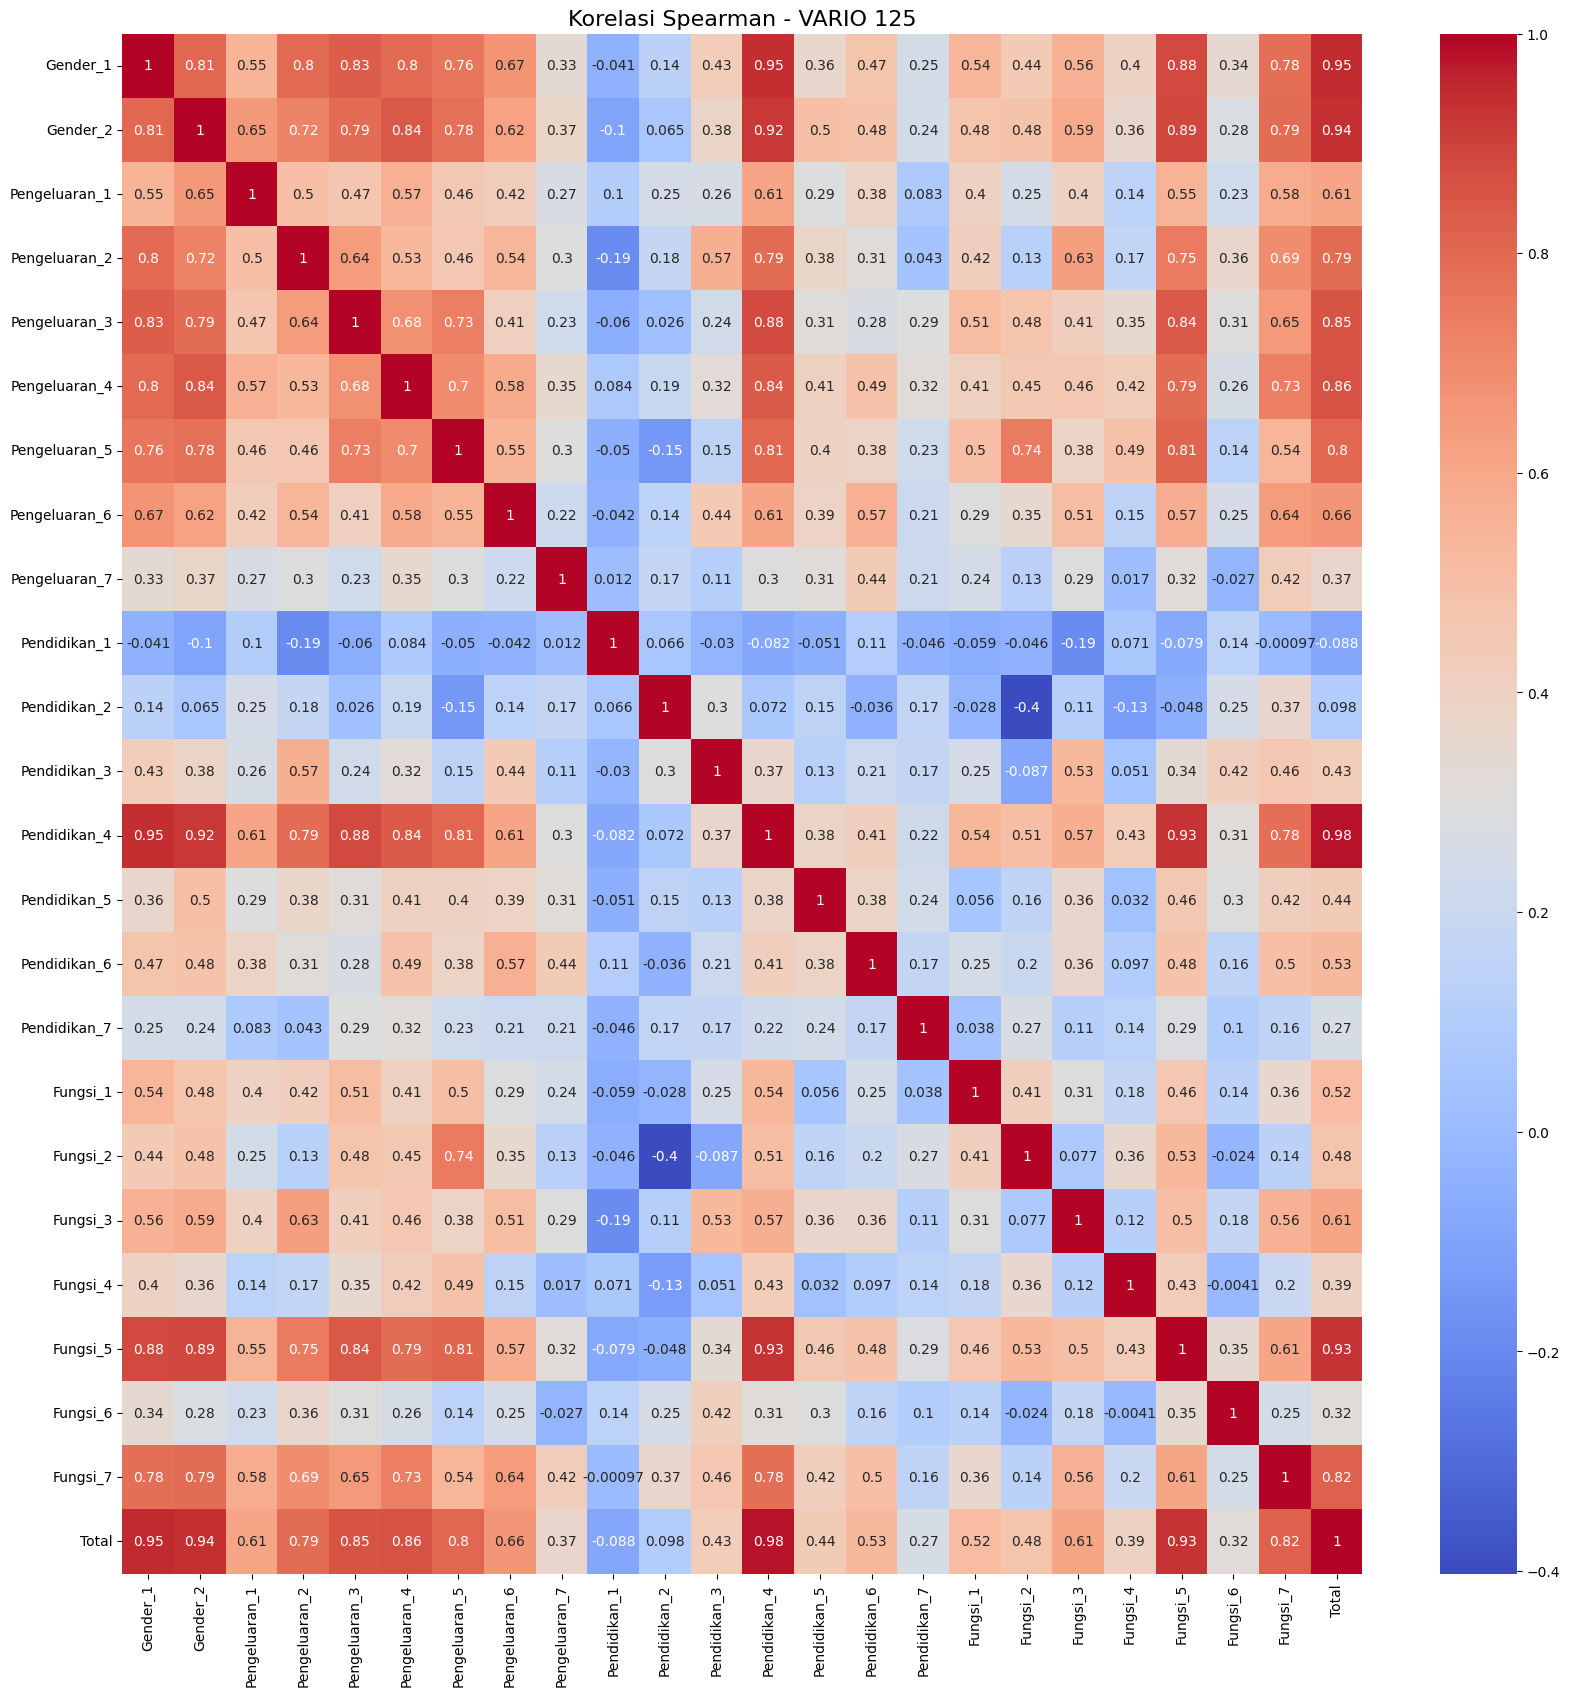

In [ ]:
# Membuat plot korelasi dengan seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(coor_spearman, annot=True, cmap='coolwarm')
plt.title('Korelasi Spearman - VARIO 125', fontsize=16)
plt.show()

In [ ]:
# Menghitung korelasi dengan kolom 'Total'
correlations = df.corr()['Total'].abs().sort_values(ascending=False)

# Memilih empat korelasi tertinggi
top_correlations = correlations[1:5]  # Mengabaikan korelasi dengan kolom 'Total' itu sendiri

# Membuat dataframe baru dengan empat kolom korelasi tertinggi dan kolom 'Total'
df = df[top_correlations.index.tolist() + ['Total']]

In [ ]:
df

,Pendidikan_4,Gender_1,Gender_2,Fungsi_5,Total
0,63,39,31,32,70
1,78,44,45,54,89
2,104,68,49,70,117
3,106,76,39,63,115
4,81,59,38,58,97
5,94,81,36,69,117
6,85,54,44,61,98
7,95,68,39,61,107
8,103,63,54,71,117
9,92,55,55,51,110


In [ ]:
# Memasukkan korelasi ke dalam data X
X = df.drop('Total', axis=1)

# Memasukkan kolom 'Total' ke dalam data y
y = df['Total']

In [ ]:
# Normalisasi data X dan y
scaler_X = MinMaxScaler()
X_normalized = scaler_X.fit_transform(X)
scaler_y = MinMaxScaler()
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [ ]:
print(X_normalized)

[[0.23888889 0.19672131 0.26966292 0.24175824]
 [0.32222222 0.23770492 0.42696629 0.48351648]
 [0.46666667 0.43442623 0.47191011 0.65934066]
 [0.47777778 0.5        0.35955056 0.58241758]
 [0.33888889 0.36065574 0.34831461 0.52747253]
 [0.41111111 0.54098361 0.3258427  0.64835165]
 [0.36111111 0.31967213 0.41573034 0.56043956]
 [0.41666667 0.43442623 0.35955056 0.56043956]
 [0.46111111 0.39344262 0.52808989 0.67032967]
 [0.4        0.32786885 0.53932584 0.45054945]
 [0.35555556 0.30327869 0.51685393 0.57142857]
 [0.42222222 0.40983607 0.49438202 0.50549451]
 [0.50555556 0.54098361 0.42696629 0.46153846]
 [0.46111111 0.43442623 0.42696629 0.53846154]
 [0.42777778 0.35245902 0.4494382  0.41758242]
 [0.44444444 0.29508197 0.68539326 0.57142857]
 [0.61666667 0.6557377  0.60674157 0.83516484]
 [0.52222222 0.52459016 0.51685393 0.54945055]
 [0.6        0.57377049 0.64044944 0.71428571]
 [0.55       0.52459016 0.58426966 0.62637363]
 [0.32777778 0.40983607 0.43820225 0.40659341]
 [0.46111111 

In [ ]:
print(y_normalized)

[[0.19704433]
 [0.29064039]
 [0.42857143]
 [0.41871921]
 [0.33004926]
 [0.42857143]
 [0.33497537]
 [0.37931034]
 [0.42857143]
 [0.39408867]
 [0.36945813]
 [0.42364532]
 [0.4729064 ]
 [0.408867  ]
 [0.36945813]
 [0.43842365]
 [0.62068966]
 [0.50246305]
 [0.5862069 ]
 [0.5320197 ]
 [0.39901478]
 [0.43842365]
 [0.27093596]
 [0.35960591]
 [0.39408867]
 [0.33004926]
 [0.24630542]
 [0.        ]
 [0.00492611]
 [0.1182266 ]
 [0.1182266 ]
 [0.1182266 ]
 [0.08866995]
 [0.        ]
 [0.07881773]
 [0.12315271]
 [0.22660099]
 [0.04926108]
 [0.14778325]
 [0.19704433]
 [0.1773399 ]
 [0.24630542]
 [0.17241379]
 [0.19211823]
 [0.26600985]
 [0.1773399 ]
 [0.19704433]
 [0.01477833]
 [0.48768473]
 [0.28571429]
 [0.94581281]
 [0.591133  ]
 [0.4137931 ]
 [0.35960591]
 [0.5862069 ]
 [0.51231527]
 [0.408867  ]
 [0.54679803]
 [1.        ]
 [0.80788177]]


In [ ]:
# Pembagian data menjadi train dan test
n_test = 12  # Jumlah data test yang diinginkan

# Bagian data menjadi X_train dan X_test
X_train = X_normalized[:-n_test]
X_test = X_normalized[-n_test:]

# Bagian data menjadi y_train dan y_test
y_train = y_normalized[:-n_test]
y_test = y_normalized[-n_test:]

In [ ]:
# Menentukan kernel dan parameter
kernels = ['linear', 'poly', 'rbf']
C_values = [0.01, 0.1, 1, 10]
epsilon_values = [0.001, 0.01, 0.1, 1]
gamma_values = [1e-4, 1e-3, 1e-2, 1e-1]
degree_values = [2, 3, 4]

In [ ]:
best_scores = {}
best_models = {}
results = {}

In [ ]:
# Grid Search
for kernel in kernels:
    if kernel == 'poly':
        # Gunakan parameter degree untuk kernel polynomial
        param_grid = {'C': C_values, 'degree': degree_values, 'epsilon': epsilon_values, 'gamma': gamma_values}
    else:
        param_grid = {'C': C_values, 'epsilon': epsilon_values, 'gamma': gamma_values}

    model = SVR(kernel=kernel)

    # Inisialisasi TimeSeriesSplit untuk melakukan Time Series Cross-Validation
    tscv = TimeSeriesSplit(n_splits=5)

    # Inisialisasi GridSearchCV dengan model SVR, param_grid, dan TimeSeriesSplit
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=tscv, n_jobs=-1)

    # Lakukan Grid Search untuk mencari parameter terbaik
    grid_search.fit(X_train, y_train)

    # Simpan hasil evaluasi untuk setiap kernel dan parameter
    for i, (params, mean_score) in enumerate(zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score'])):
        if kernel not in results:
            results[kernel] = {}
        param_key = '_'.join([f"{key}_{params[key]}" for key in params])
        mae_score = -grid_search.cv_results_['mean_test_score'][i]
        rmse_score = np.sqrt(mean_squared_error(y_train, grid_search.predict(X_train)))
        r2_score_value = r2_score(y_train, grid_search.predict(X_train))
        results[kernel][param_key] = {'MAE': mae_score, 'RMSE': rmse_score, 'R2 Score': r2_score_value}

    # Simpan model terbaik untuk setiap kernel
    best_models[kernel] = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Tampilkan hasil evaluasi untuk masing-masing kernel dan parameter
print("Hasil evaluasi untuk masing-masing kernel dan parameter:")
for kernel in results:
    print(f"Kernel: {kernel}")
    for param_key, scores in results[kernel].items():
        print(f"Parameter: {param_key}")
        print(f"MAE: {scores['MAE']}")
        print(f"RMSE: {scores['RMSE']}")
        print(f"R2 Score: {scores['R2 Score']}")
        print("----------------------------")

Hasil evaluasi untuk masing-masing kernel dan parameter:
Kernel: linear
Parameter: C_0.01_epsilon_0.001_gamma_0.0001
MAE: 0.1477190353467029
RMSE: 0.0007904566515530109
R2 Score: 0.9999756868318971
----------------------------
Parameter: C_0.01_epsilon_0.001_gamma_0.001
MAE: 0.1477190353467029
RMSE: 0.0007904566515530109
R2 Score: 0.9999756868318971
----------------------------
Parameter: C_0.01_epsilon_0.001_gamma_0.01
MAE: 0.1477190353467029
RMSE: 0.0007904566515530109
R2 Score: 0.9999756868318971
----------------------------
Parameter: C_0.01_epsilon_0.001_gamma_0.1
MAE: 0.1477190353467029
RMSE: 0.0007904566515530109
R2 Score: 0.9999756868318971
----------------------------
Parameter: C_0.01_epsilon_0.01_gamma_0.0001
MAE: 0.1479051763164439
RMSE: 0.0007904566515530109
R2 Score: 0.9999756868318971
----------------------------
Parameter: C_0.01_epsilon_0.01_gamma_0.001
MAE: 0.1479051763164439
RMSE: 0.0007904566515530109
R2 Score: 0.9999756868318971
----------------------------
Paramet

In [ ]:
# Cari kernel dengan nilai evaluasi terbaik
best_kernel = None
best_score = float('inf')
for kernel, kernel_results in results.items():
    for param_key, scores in kernel_results.items():
        if scores['MAE'] < best_score:
            best_kernel = kernel
            best_score = scores['MAE']

In [ ]:
# Ambil model terbaik untuk kernel dengan nilai evaluasi terbaik
best_model = best_models[best_kernel]

In [ ]:
# Mencetak kernel terbaik dan parameter terbaik
best_params = best_model.get_params()
best_C = best_params['C']
best_epsilon = best_params['epsilon']
best_gamma = best_params['gamma']
best_degree = best_params['degree'] if 'degree' in best_params else None

print(f"Kernel terbaik: {best_kernel}")
print(f"Parameter terbaik: C={best_C}, epsilon={best_epsilon}, gamma={best_gamma}", end="")
if best_kernel == 'poly':
    print(f", degree={best_degree}")
else:
    print("")

Kernel terbaik: linear
Parameter terbaik: C=10, epsilon=0.001, gamma=0.0001


In [ ]:
# Prediksi menggunakan model terbaik
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [ ]:
# Denormalisasi hasil prediksi untuk mendapatkan nilai aktual
y_train_actual_denorm = scaler_y.inverse_transform(y_train)
y_train_pred_denorm = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_actual_denorm = scaler_y.inverse_transform(y_test)
y_test_pred_denorm = scaler_y.inverse_transform(y_test_pred.reshape(-1, 1))

In [ ]:
# Hitung dan tampilkan evaluasi untuk model terbaik
train_mae = mean_absolute_error(y_train_actual_denorm, y_train_pred_denorm)
test_mae = mean_absolute_error(y_test_actual_denorm, y_test_pred_denorm)
train_rmse = mean_squared_error(y_train_actual_denorm, y_train_pred_denorm, squared=False)
test_rmse = mean_squared_error(y_test_actual_denorm, y_test_pred_denorm, squared=False)
train_r2 = r2_score(y_train_actual_denorm, y_train_pred_denorm)
test_r2 = r2_score(y_test_actual_denorm, y_test_pred_denorm)

print("\nHasil evaluasi untuk model terbaik:")
print(f"Train MAE: {train_mae}")
print(f"Train RMSE: {train_rmse}")
print(f"Train R2 Score: {train_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test RMSE: {test_rmse}")
print(f"Test R2 Score: {test_r2}")


Hasil evaluasi untuk model terbaik:
Train MAE: 0.13406195063553597
Train RMSE: 0.1604627002652622
Train R2 Score: 0.9999756868318971
Test MAE: 0.2025484641505623
Test RMSE: 0.2942227415661912
Test R2 Score: 0.9999556653894475


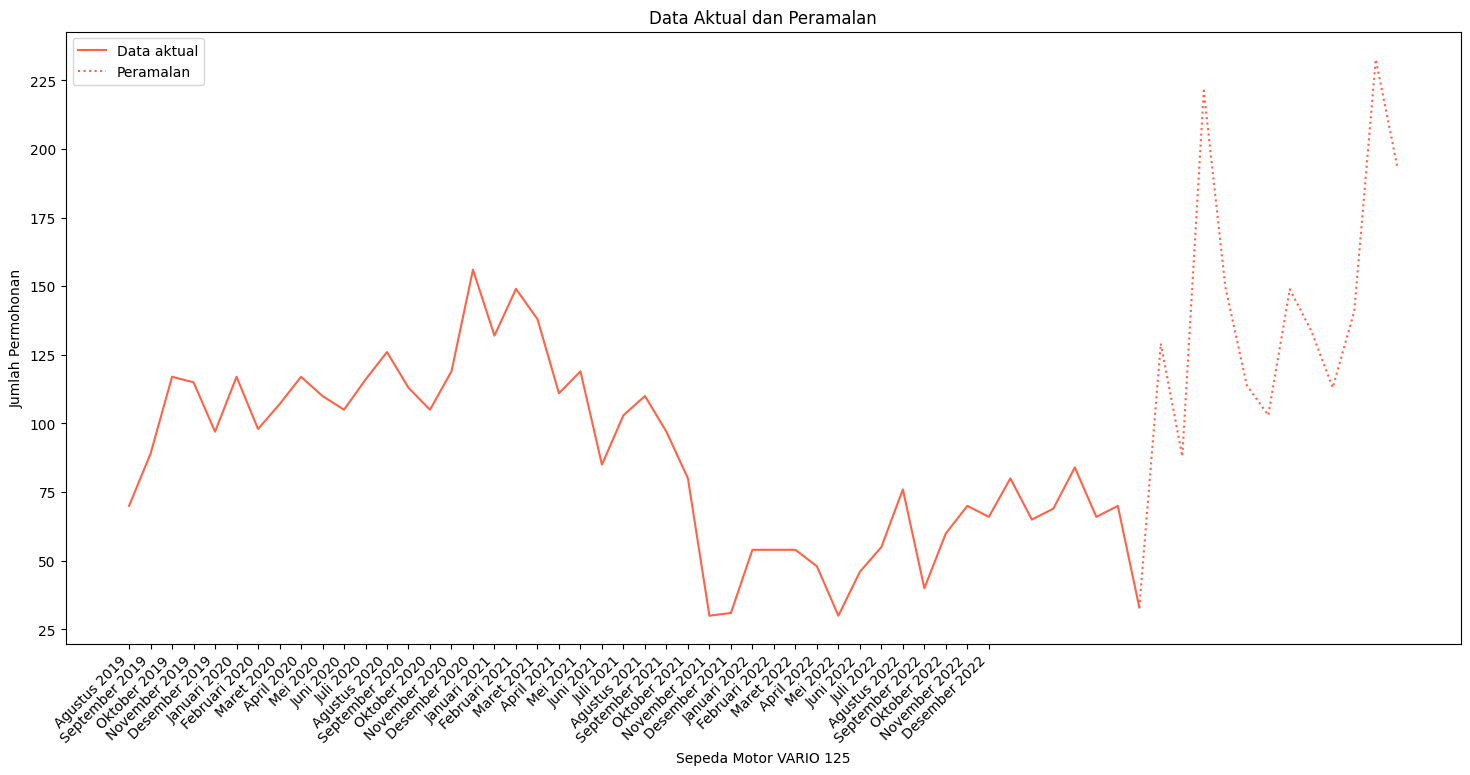

In [ ]:
# Denormalisasi data train dan test
y_train_actual = y_train_actual_denorm.flatten()
y_test_actual = y_test_actual_denorm.flatten()
y_test_pred_denorm = y_test_pred_denorm.flatten()

# Plot data aktual untuk pelatihan (train)
plt.figure(figsize=(18, 9))
plt.subplots_adjust(bottom=0.2)

plt.plot(y_train_actual, label='Data aktual', color='tomato')

test_range = range(len(y_train_actual), len(y_train_actual) + len(y_test_pred_denorm))

# Plot hasil prediksi
plt.plot(test_range, y_test_pred_denorm, label='Peramalan', color='tomato', linestyle='dotted')

# Menghubungkan garis dengan menambahkan titik terakhir data pelatihan ke data uji
plt.plot([len(y_train_actual) - 1, test_range[0]], [y_train_actual[-1], y_test_pred_denorm[0]], color='tomato', linestyle='dotted')

# Atur label dan judul grafik
plt.xlabel('Sepeda Motor VARIO 125')
plt.ylabel('Jumlah Permohonan')
plt.title('Data Aktual dan Peramalan')

# Ganti nilai pada sumbu x dengan label bulan dan tahun
x_labels = ['Agustus 2019', 'September 2019', 'Oktober 2019', 'November 2019', 'Desember 2019',
            'Januari 2020', 'Februari 2020', 'Maret 2020', 'April 2020', 'Mei 2020', 'Juni 2020', 'Juli 2020',
            'Agustus 2020', 'September 2020', 'Oktober 2020', 'November 2020', 'Desember 2020',
            'Januari 2021', 'Februari 2021', 'Maret 2021', 'April 2021', 'Mei 2021', 'Juni 2021', 'Juli 2021',
            'Agustus 2021', 'September 2021', 'Oktober 2021', 'November 2021', 'Desember 2021',
            'Januari 2022', 'Februari 2022', 'Maret 2022', 'April 2022', 'Mei 2022', 'Juni 2022', 'Juli 2022',
            'Agustus 2022', 'September 2022', 'Oktober 2022', 'November 2022', 'Desember 2022']

plt.xticks(range(len(x_labels)), x_labels, rotation=45, ha="right")

# Tambahkan legenda
plt.legend()

# Simpan grafik sebagai file PNG
plt.savefig('Grafik Peramalan VARIO 125.png', bbox_inches='tight')

# Tampilkan grafik
plt.show()


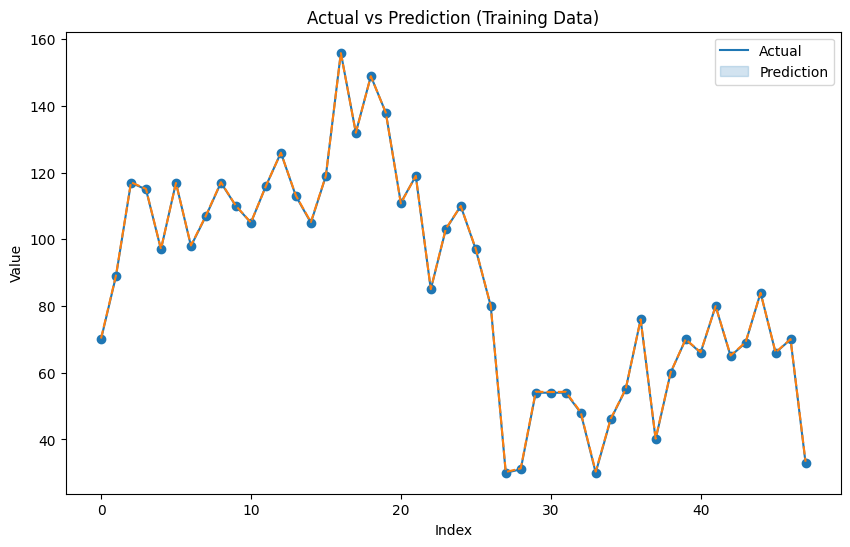

In [ ]:
# Visualisasi data aktual dan prediksi untuk data latih
plt.figure(figsize=(10, 6))
sns.lineplot(data=pd.DataFrame({'Actual': y_train_actual_denorm.flatten(), 'Prediction': y_train_pred_denorm.flatten()}))
plt.scatter(x=range(len(y_train_actual_denorm)), y=y_train_actual_denorm.flatten())
plt.title('Actual vs Prediction (Training Data)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(['Actual', 'Prediction'])
plt.show()

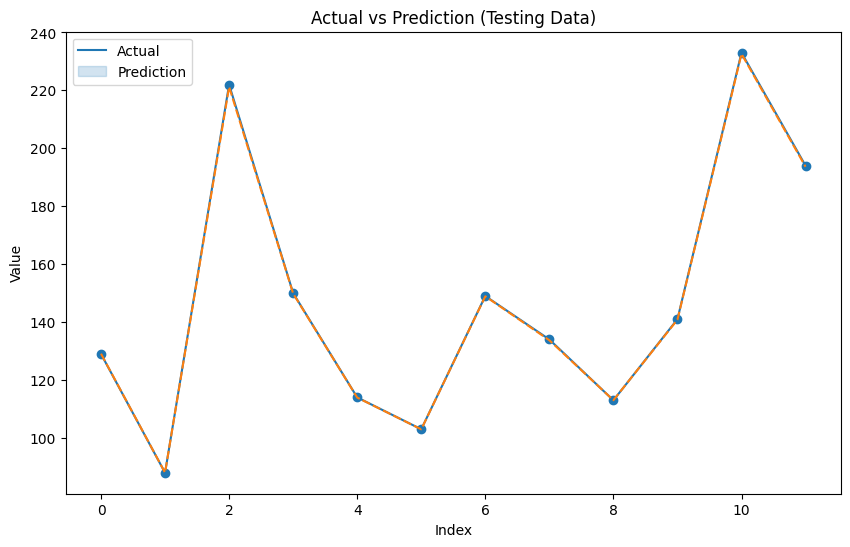

In [ ]:
# Visualisasi data aktual dan prediksi untuk data uji
plt.figure(figsize=(10, 6))
sns.lineplot(data=pd.DataFrame({'Actual': y_test_actual_denorm.flatten(), 'Prediction': y_test_pred_denorm.flatten()}))
plt.scatter(x=range(len(y_test_actual_denorm)), y=y_test_actual_denorm.flatten())
plt.title('Actual vs Prediction (Testing Data)')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(['Actual', 'Prediction'])
plt.show()

In [ ]:
# Mencetak nilai aktual dan prediksi untuk model terbaik
print("Nilai Aktual dan Prediksi untuk Model Terbaik:")
print("Data Latih:")
for actual, pred in zip(y_train_actual_denorm, y_train_pred_denorm):
    print(f"Aktual: {actual} - Prediksi: {pred}")
print("\nData Uji:")
for actual, pred in zip(y_test_actual_denorm, y_test_pred_denorm):
    print(f"Aktual: {actual} - Prediksi: {pred}")

Nilai Aktual dan Prediksi untuk Model Terbaik:
Data Latih:
Aktual: [70.] - Prediksi: [70.26264979]
Aktual: [89.] - Prediksi: [89.23811851]
Aktual: [117.] - Prediksi: [117.14433088]
Aktual: [115.] - Prediksi: [115.15299769]
Aktual: [97.] - Prediksi: [97.1052176]
Aktual: [117.] - Prediksi: [116.92868429]
Aktual: [98.] - Prediksi: [98.18222843]
Aktual: [107.] - Prediksi: [107.1360549]
Aktual: [117.] - Prediksi: [117.15296542]
Aktual: [110.] - Prediksi: [110.06810576]
Aktual: [105.] - Prediksi: [105.06667429]
Aktual: [116.] - Prediksi: [116.00704564]
Aktual: [126.] - Prediksi: [126.00333251]
Aktual: [113.] - Prediksi: [113.16045709]
Aktual: [105.] - Prediksi: [105.20458547]
Aktual: [119.] - Prediksi: [119.09952006]
Aktual: [156.] - Prediksi: [155.87844215]
Aktual: [132.] - Prediksi: [131.98670912]
Aktual: [149.] - Prediksi: [148.95376747]
Aktual: [138.] - Prediksi: [137.99001814]
Aktual: [111.] - Prediksi: [110.79365399]
Aktual: [119.] - Prediksi: [119.07081776]
Aktual: [85.] - Prediksi: [